# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'
unit = 'imperial'
query = f'{url}appid={weather_api_key}&units={unit}&q='
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | paita
Processing Record 2 of Set 1 | vizinga
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | remire-montjoly
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | geraldton
Processing Record 9 of Set 1 | qal'at bishah
City not found. Skipping...
Processing Record 10 of Set 1 | xunchang
Processing Record 11 of Set 1 | whitehorse
Processing Record 12 of Set 1 | cockburn town
Processing Record 13 of Set 1 | saipan
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | zhosaly
Processing Record 16 of Set 1 | khandyga
Processing Record 17 of Set 1 | ust-nera
Processing Record 18 of Set 1 | santa cruz
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | sirte
Processing Record 21 of Set 1 | kazalinsk
City not found. Skipping.

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,paita,-5.0892,-81.1144,69.08,83,10,17.69,PE,1699924132
1,vizinga,61.0749,50.1031,36.52,98,100,6.15,RU,1699924191
2,jamestown,42.0970,-79.2353,48.56,75,0,10.36,US,1699924104
3,georgetown,5.4112,100.3354,82.94,89,20,4.61,MY,1699923998
4,puerto natales,-51.7236,-72.4875,33.91,85,87,7.85,CL,1699924034


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,paita,-5.0892,-81.1144,69.08,83,10,17.69,PE,1699924132
1,vizinga,61.0749,50.1031,36.52,98,100,6.15,RU,1699924191
2,jamestown,42.0970,-79.2353,48.56,75,0,10.36,US,1699924104
3,georgetown,5.4112,100.3354,82.94,89,20,4.61,MY,1699923998
4,puerto natales,-51.7236,-72.4875,33.91,85,87,7.85,CL,1699924034


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

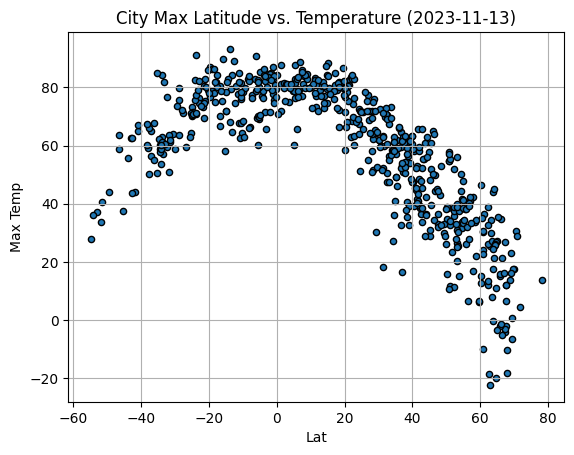

In [18]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
# YOUR CODE HERE
city_data_df.plot(kind='scatter', x = 'Lat',y = 'Max Temp', title= 'City Max Latitude vs. Temperature (2023-11-13)', grid=True, edgecolors = 'black')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

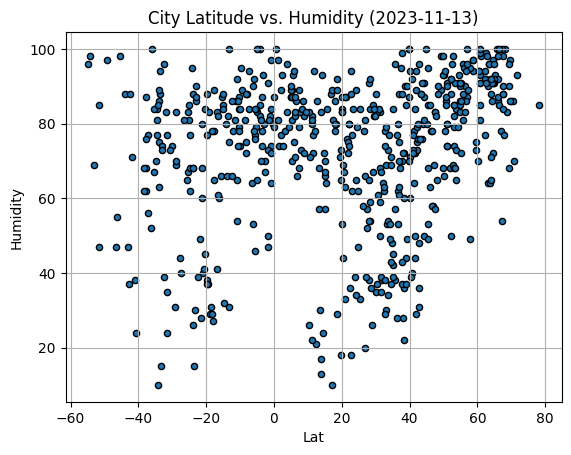

In [19]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
# YOUR CODE HERE
city_data_df.plot(kind='scatter', x = 'Lat',y = 'Humidity', title= 'City Latitude vs. Humidity (2023-11-13)', grid=True, edgecolors = 'black')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

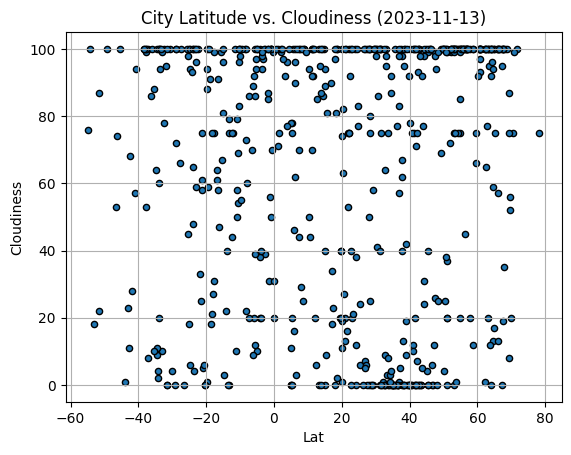

In [20]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
# YOUR CODE HERE
city_data_df.plot(kind='scatter', x = 'Lat',y = 'Cloudiness', title= 'City Latitude vs. Cloudiness (2023-11-13)', grid=True, edgecolors = 'black')
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

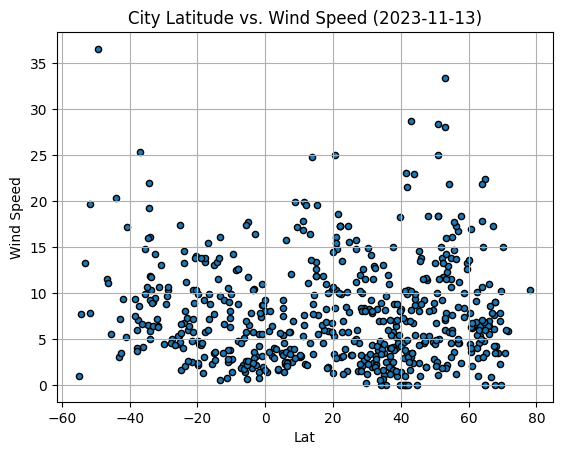

In [21]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
# YOUR CODE HERE
city_data_df.plot(kind='scatter', x = 'Lat',y = 'Wind Speed', title= 'City Latitude vs. Wind Speed (2023-11-13)', grid=True, edgecolors = 'black')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def regression_plot(x, y, x_label, y_label):
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    print(f'The r-value is {rvalue}')
    line_equation = f'y = {round(slope,2)}x + {round(intercept,2)}'
    regression = x * slope + intercept
    
    plt.scatter(x,y, marker='o', edgecolors='black')
    plt.plot(x, regression, color = 'red', linewidth = 3)
    plt.annotate(line_equation, xy=(1, 1), xytext=(12, -12), va='top',
             xycoords='axes fraction', textcoords='offset points', color = 'red', fontsize = 20)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()


In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] > 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vizinga,61.0749,50.1031,36.52,98,100,6.15,RU,1699924191
2,jamestown,42.0970,-79.2353,48.56,75,0,10.36,US,1699924104
3,georgetown,5.4112,100.3354,82.94,89,20,4.61,MY,1699923998
5,remire-montjoly,4.9167,-52.2667,78.84,89,0,3.44,GF,1699924191
8,xunchang,28.4543,104.7150,51.46,84,100,2.06,CN,1699924192


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,paita,-5.0892,-81.1144,69.08,83,10,17.69,PE,1699924132
4,puerto natales,-51.7236,-72.4875,33.91,85,87,7.85,CL,1699924034
6,margaret river,-33.9500,115.0667,62.80,75,100,11.81,AU,1699924032
7,geraldton,-28.7667,114.6000,75.61,69,100,10.36,AU,1699924192
12,puerto ayora,-0.7393,-90.3518,75.54,97,100,1.99,EC,1699924193


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8781498574981669


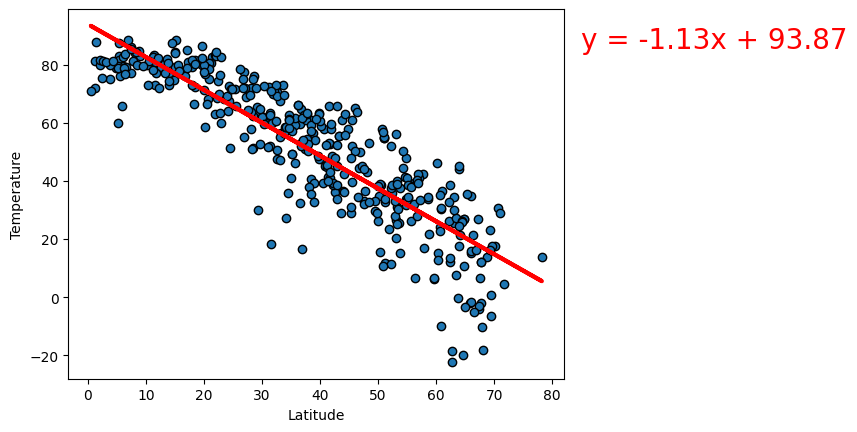

In [46]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Temperature')

The r-value is 0.7112033619286054


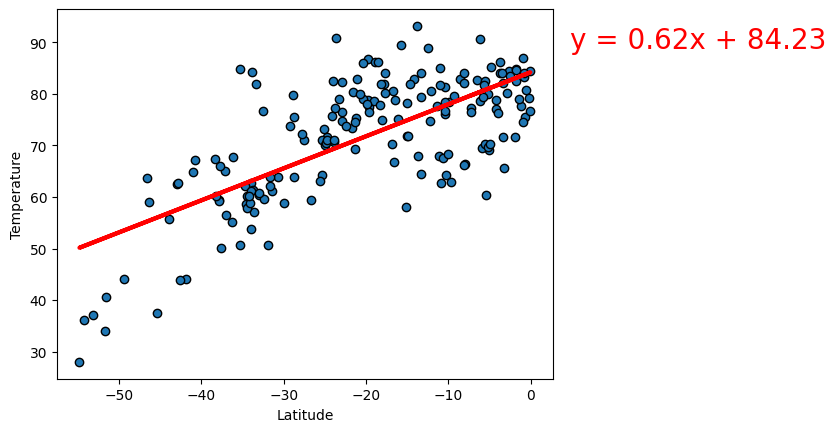

In [47]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Temperature')

**Discussion about the linear relationship:** The temperature rises as we get closer to the hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.2773907040660756


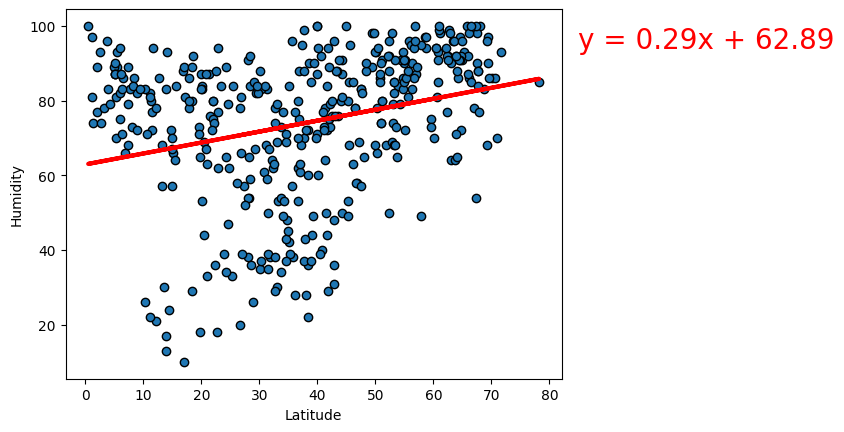

In [48]:
# Northern Hemisphere
# YOUR CODE HERE
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity')

The r-value is 0.17477908143576773


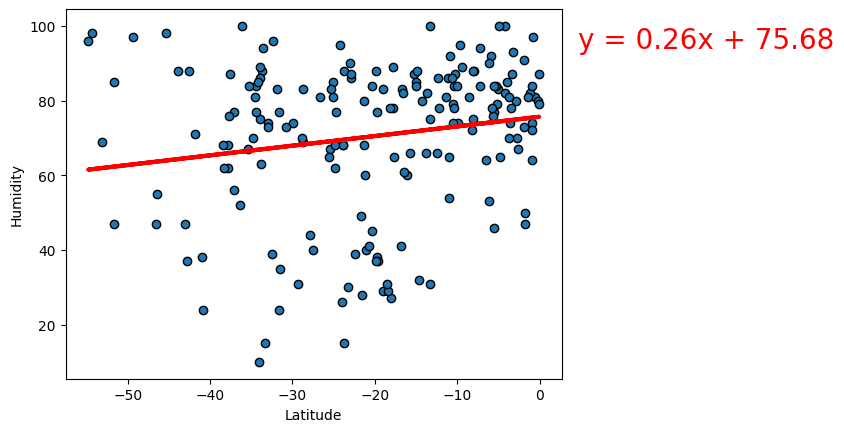

In [49]:
# Southern Hemisphere
# YOUR CODE HERE
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity')

**Discussion about the linear relationship:** There is much more humidity in the Northern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.12667632138473742


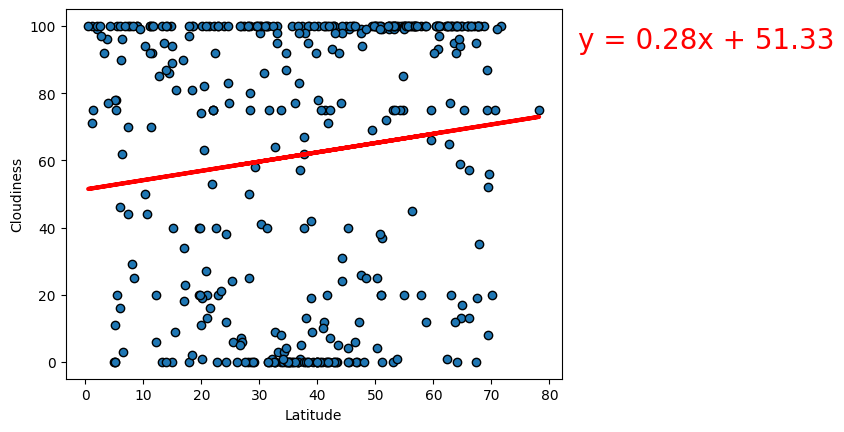

In [50]:
# Northern Hemisphere
# YOUR CODE HERE
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

The r-value is 0.07015425290961884


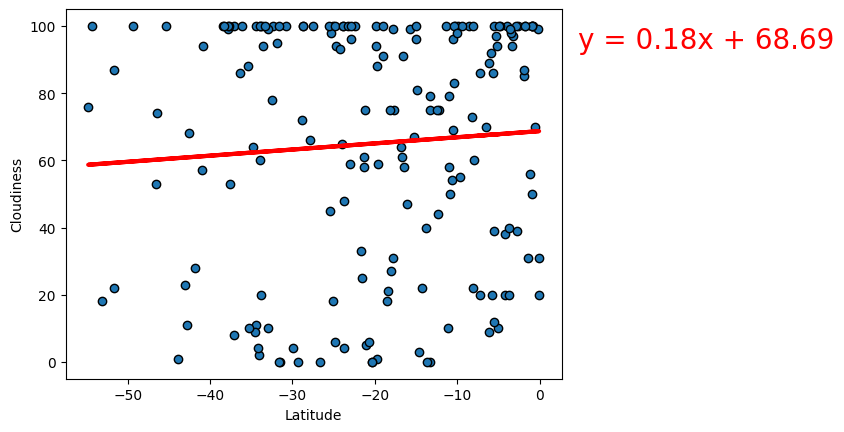

In [51]:
# Southern Hemisphere
# YOUR CODE HERE
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** The Nothern Hemisphere is a bit more cloudy than the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.057580209084925976


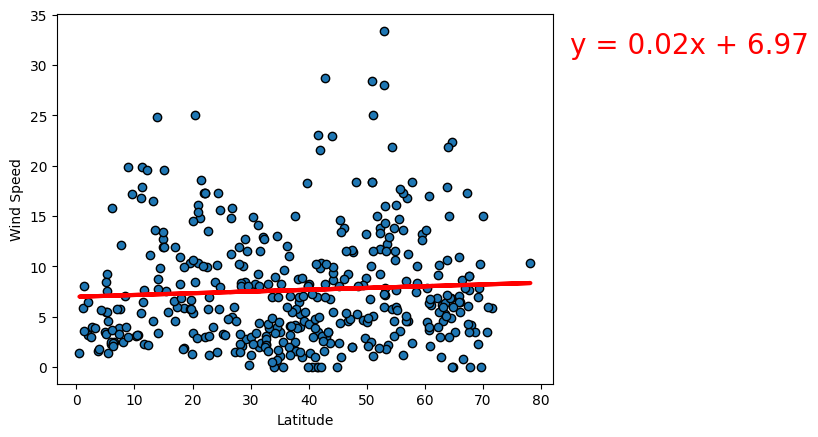

In [52]:
# Northern Hemisphere
# YOUR CODE HERE
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

The r-value is -0.30934715302333193


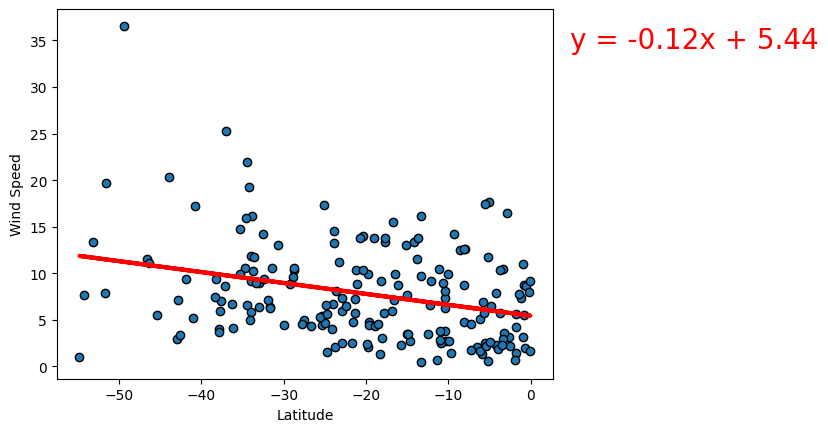

In [53]:
# Southern Hemisphere
# YOUR CODE HERE
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** Wind speeds are overall pretty insignificant with few outliers in both hemispheres.